In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression,Ridge,Lasso

In [2]:
df_1 = pd.read_csv('boston_housing.csv')
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


## Data Description

- crim :
    per capita crime rate by town.

- zn :
    proportion of residential land zoned for lots over 25,000 sq.ft.

- indus :
    proportion of non-retail business acres per town.

- chas :
    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

- nox :
    nitrogen oxides concentration (parts per 10 million).

- rm :
    average number of rooms per dwelling.

- age :
    proportion of owner-occupied units built prior to 1940.

- dis :
    weighted mean of distances to five Boston employment centres.

- rad :
    index of accessibility to radial highways.

- tax :
    full-value property-tax rate per \$10,000.

- ptratio :
    pupil-teacher ratio by town.

- black :
    1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

- lstat :
    lower status of the population (percent).

- medv :
    median value of owner-occupied homes in \$1000s.



In [3]:
display(df_1.head())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
display(df_1.tail())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
print('Number of duplicated data :')
print(df_1.duplicated().sum())

Number of duplicated data :
0


## Exploratory Data Analysis

In [6]:
statistics_ = df_1.describe().T
kurt_ = df_1.kurtosis()
skew_ = df_1.skew()
statistics_['Skewness'] = skew_
statistics_['Kurtosis'] = kurt_
display(statistics_)

,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762,5.223149,37.130509
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,2.225666,4.031510
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,0.295022,-1.233540
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,3.405904,9.638264
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.729308,-0.064667
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,0.403612,1.891500
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,-0.598963,-0.967716
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,1.011781,0.487941
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,1.004815,-0.867232
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,0.669956,-1.142408


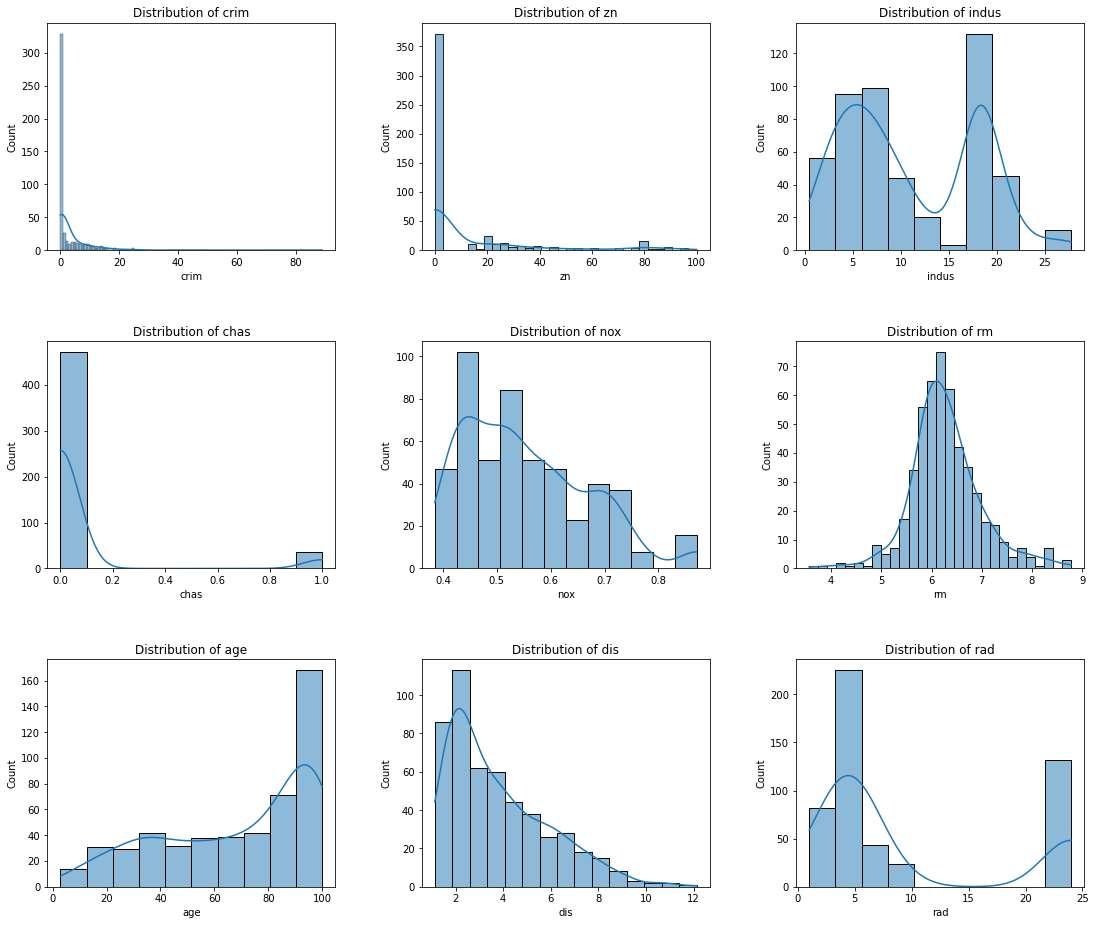

In [7]:
fig, ax = plt.subplots(3,3, figsize = (18,15))
columns_ = df_1.columns.values[:9]
columns_val = 0
for row in range(3):
    for col in range(3):
        sns.histplot(x = columns_[columns_val], data = df_1,kde=True, ax = ax[row,col])
        ax[row,col].set_title(f'Distribution of {columns_[columns_val]}')
        columns_val += 1
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()
    

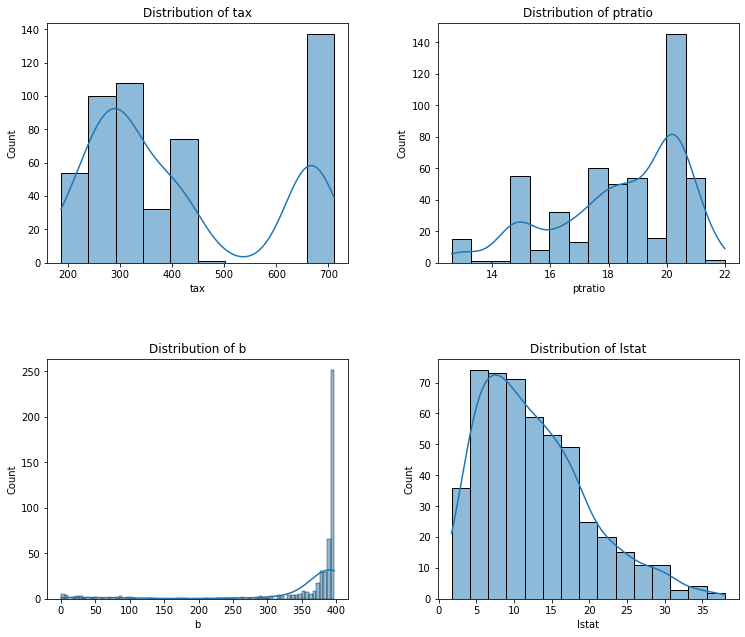

In [8]:
fig, ax = plt.subplots(2,2, figsize = (12,10))
columns_ = df_1.columns.values[9:-1]
columns_val = 0
for row in range(2):
    for col in range(2):
        sns.histplot(x = columns_[columns_val], data = df_1,kde=True, ax = ax[row,col])
        ax[row,col].set_title(f'Distribution of {columns_[columns_val]}')
        columns_val += 1
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()

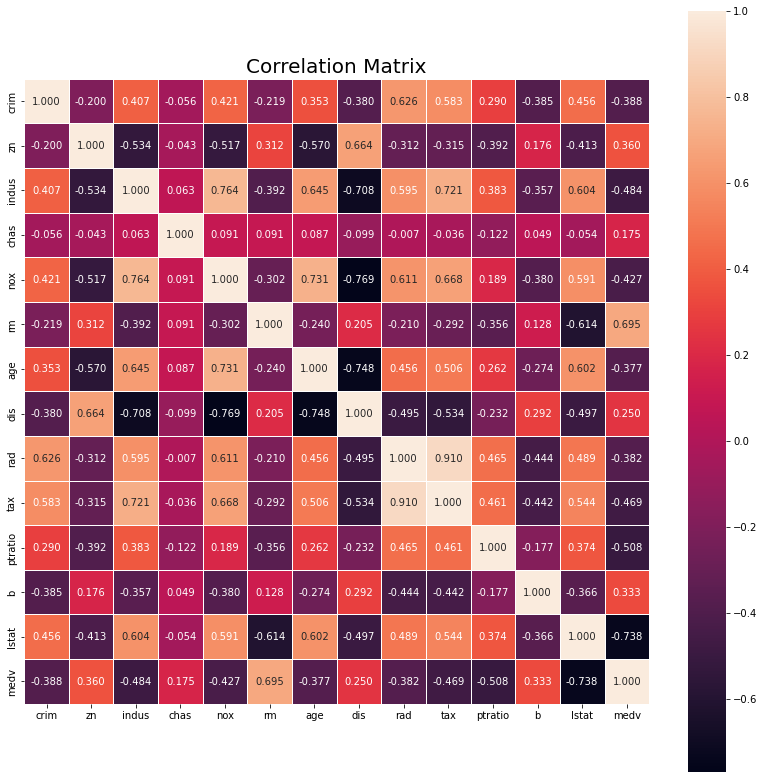

In [9]:
corr = df_1.corr()
fig,ax = plt.subplots(figsize = (14,14))
sns.heatmap(corr, linewidths = 0.5,fmt = '.3f',annot = True, square= True, ax = ax)
ax.set_title('Correlation Matrix', fontsize = 20)
plt.show()

## Outlier Detection using Mahalanobis Distance 

- Mahalanobis Formula :
$$ D_{ij} = \large(X_{i}-X_{j})^{T}S^{-1}(X_{i}-X_{j})$$

In [10]:
from scipy.stats import chi2
inv_cov_matrix = np.linalg.inv(np.cov(df_1.values, rowvar=False))
mean_vectors = np.mean(df_1.values, axis=0)
distance = []
for i , val in df_1.iterrows():
    p1 = val.values
    p2 = mean_vectors
    distance.append(np.transpose(p1-p2).dot(inv_cov_matrix).dot(p1-p2))
cutoff = chi2.ppf(0.95, df_1.shape[1])
outliers_ = df_1.iloc[np.where(distance > cutoff)[0]]
df_1_new = df_1.iloc[np.where(distance <= cutoff)[0]]
loss_data = (df_1.shape[0]-df_1_new.shape[0])/df_1.shape[0]
display(outliers_.head())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,2,188,19.1,389.15,14.37,22.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [11]:
print(df_1.shape)
print(df_1_new.shape)
print(f'loss data : {loss_data}')

(506, 14)
(442, 14)
loss data : 0.12648221343873517


## Feature Selection 

In [12]:
## Removing redundant feautures from the data
df_1_copy = df_1_new.copy()
df_1_copy.drop(['dis','nox','tax'], axis = 1, inplace = True)
display(df_1_copy.corr())

,crim,zn,indus,chas,rm,age,rad,ptratio,b,lstat,medv
crim,1.000000,-0.266916,0.623023,-0.071089,-0.295389,0.472962,0.811389,0.380869,-0.426674,0.679899,-0.533007
zn,-0.266916,1.000000,-0.524861,-0.019080,0.312251,-0.551262,-0.321771,-0.461204,0.170173,-0.434877,0.387288
indus,0.623023,-0.524861,1.000000,-0.012119,-0.395585,0.619193,0.720374,0.484482,-0.386770,0.675202,-0.608536
chas,-0.071089,-0.019080,-0.012119,1.000000,0.066414,0.018125,-0.033881,-0.062735,0.063210,-0.036158,0.105367
rm,-0.295389,0.312251,-0.395585,0.066414,1.000000,-0.199184,-0.220780,-0.377140,0.071494,-0.582751,0.750810
age,0.472962,-0.551262,0.619193,0.018125,-0.199184,1.000000,0.487165,0.333647,-0.269482,0.650694,-0.445567
rad,0.811389,-0.321771,0.720374,-0.033881,-0.220780,0.487165,1.000000,0.461849,-0.463195,0.623064,-0.500189
ptratio,0.380869,-0.461204,0.484482,-0.062735,-0.377140,0.333647,0.461849,1.000000,-0.217851,0.464134,-0.587481
b,-0.426674,0.170173,-0.386770,0.063210,0.071494,-0.269482,-0.463195,-0.217851,1.000000,-0.414587,0.359078
lstat,0.679899,-0.434877,0.675202,-0.036158,-0.582751,0.650694,0.623064,0.464134,-0.414587,1.000000,-0.776241


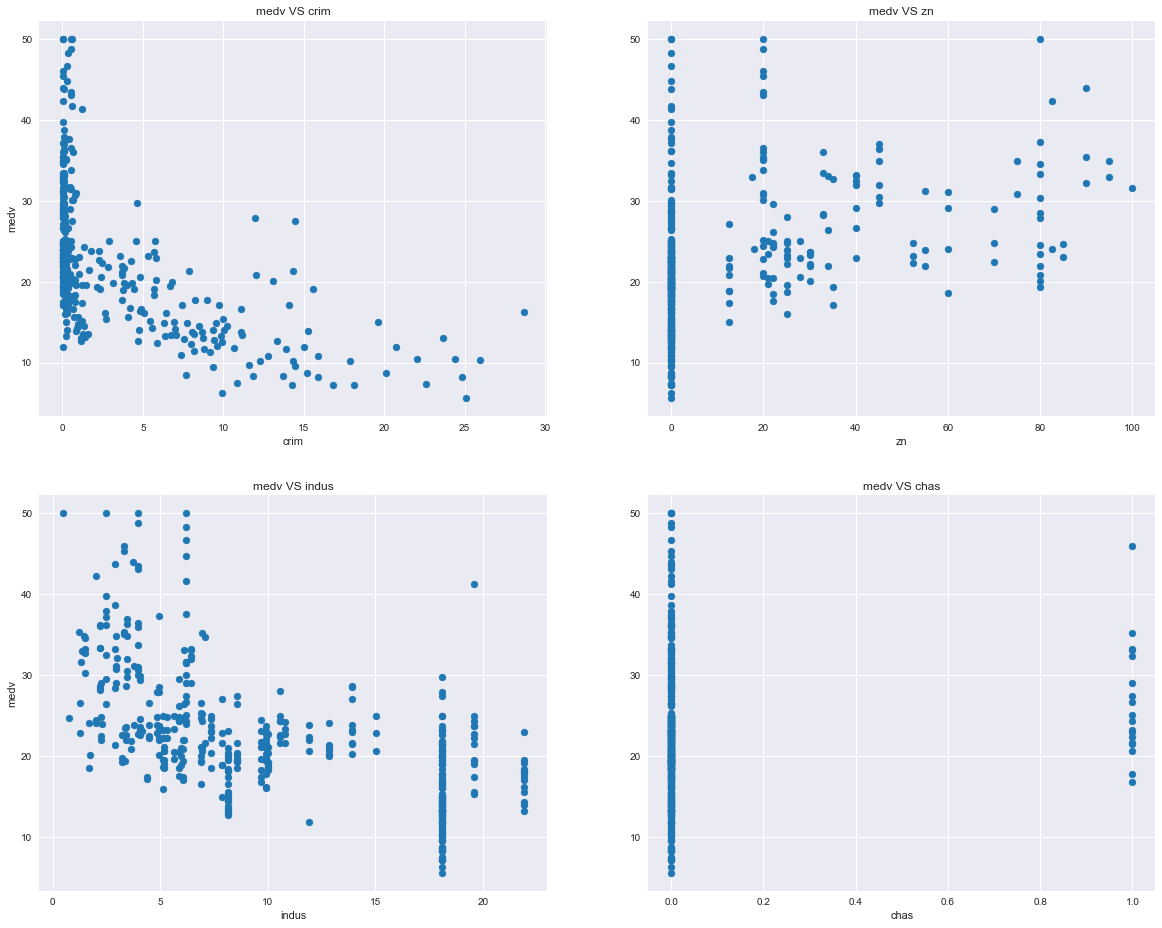

In [13]:
plt.style.use('seaborn')
columns_ = ['crim', 'zn', 'indus', 'chas']
fig, ax = plt.subplots(2,2, figsize = (20,16))
columns_val = 0
for row in range(2):
    for col in range(2):
        ax[row,col].scatter(x = df_1_copy[columns_[columns_val]], y = df_1_copy['medv'], color = 'tab:blue')
        ax[row,col].set_xlabel(columns_[columns_val])
        ax[row,col].set_title('medv' + ' VS ' +  columns_[columns_val])
        columns_val += 1
    ax[row,0].set_ylabel('medv')
plt.show()

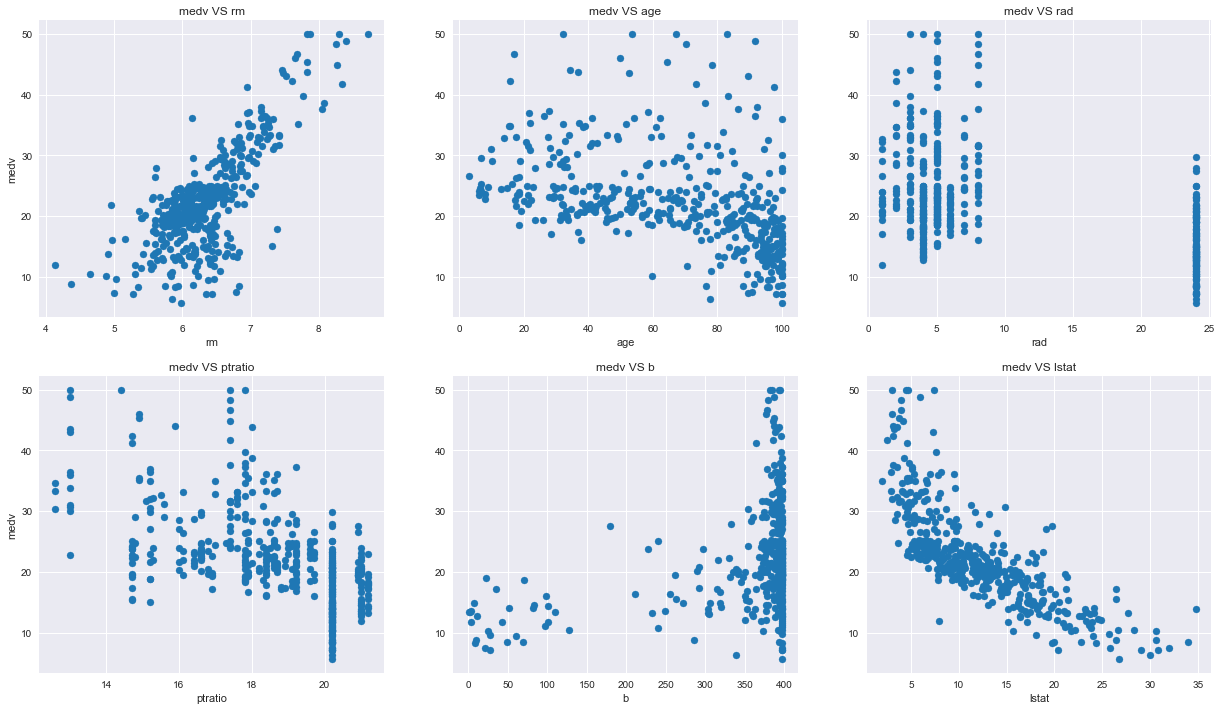

In [14]:
columns_ = ['rm', 'age','rad','ptratio','b','lstat']
fig, ax = plt.subplots(2,3, figsize = (21,12))
columns_val = 0
for row in range(2):
    for col in range(3):
        ax[row,col].scatter(x = df_1_copy[columns_[columns_val]], y = df_1_copy['medv'], color = 'tab:blue')
        ax[row,col].set_xlabel(columns_[columns_val])
        ax[row,col].set_title('medv' + ' VS ' +  columns_[columns_val])
        columns_val += 1
    ax[row,0].set_ylabel('medv')
plt.show()

## Data Preprocessing

In [15]:
## Define new variables for independent features and target feature.
X_1 = df_1_copy.drop('medv', axis = 1)
Y_1 = df_1_copy['medv']

print('Independent Variables :')
display(X_1.head())
print('-'*25)
print('Dependent Variable :')
display(Y_1.head())

Independent Variables :


,crim,zn,indus,chas,rm,age,rad,ptratio,b,lstat
0,0.00632,18.0,2.31,0,6.575,65.2,1,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,6.421,78.9,2,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,7.185,61.1,2,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,6.998,45.8,3,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,7.147,54.2,3,18.7,396.90,5.33


-------------------------
Dependent Variable :


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [16]:
## Splitting data into training and testing data.
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,Y_1, test_size= 0.25 ,random_state=  43)
print(f'Row x_train : {X_1_train.shape[0]} & y_train : {y_1_train.shape[0]}')
print(f'Row x_test : {X_1_test.shape[0]} & y_test : {y_1_test.shape[0]}')

Row x_train : 331 & y_train : 331
Row x_test : 111 & y_test : 111


In [17]:
## Standardizing data using Standard Scaler
std = StandardScaler()
X_1_train[X_1_train.columns.values] = std.fit_transform(X_1_train)
X_1_test[X_1_test.columns.values] = std.fit_transform(X_1_test)

In [18]:
display(X_1_train.head())

,crim,zn,indus,chas,rm,age,rad,ptratio,b,lstat
37,-0.517532,-0.499890,-0.661170,-0.202189,-0.773438,-0.952847,-0.502975,0.364993,0.406626,-0.558642
467,0.302575,-0.499890,1.292220,-0.202189,-0.513264,1.014203,1.718381,0.850770,-0.345716,1.388666
397,0.916359,-0.499890,1.292220,-0.202189,-0.948589,1.177505,1.718381,0.850770,0.363051,1.171437
244,-0.493745,0.426016,-0.677260,-0.202189,-1.210463,0.346148,-0.269148,0.316415,0.126719,0.020120
105,-0.507620,-0.499890,-0.242816,-0.202189,-0.771738,1.095854,-0.502975,1.190813,0.373945,0.636121


## Model Building and Evaluation

In [19]:
lr_1 = LinearRegression()
lr_1.fit(X_1_train, y_1_train)
r2_score = lr_1.score(X_1_train,y_1_train)
y_pred = lr_1.predict(X_1_test)
mse = mean_squared_error(y_1_test,y_pred)
rmse = np.sqrt(mse)

print('Model Evaluation :')
print('R-Squared Score for model :')
print(r2_score)
print('MSE score :')
print(mse)
print('RMSE score :')
print(rmse)
print('='*50)
print('coefficients of the model :')
print(f'Intercept : {np.round(lr_1.intercept_,3)}')
for i in range(X_1_train.shape[1]):
    print(f'{X_1_train.columns.values[i]} : {np.round(lr_1.coef_[i],3)}')

Model Evaluation :
R-Squared Score for model :
0.810042706265971
MSE score :
17.880345765317443
RMSE score :
4.228515787521367
coefficients of the model :
Intercept : 22.156
crim : 0.062
zn : -0.519
indus : -0.388
chas : 0.171
rm : 4.068
age : -0.605
rad : -0.302
ptratio : -1.706
b : 0.835
lstat : -1.997


## Performin OLS with Statsmodels

In [20]:
import statsmodels.api as sm
X_train_copy = X_1_train.copy()
Y_train_copy = y_1_train.copy()
X_train_copy = sm.add_constant(X_train_copy)
model = sm.OLS(Y_train_copy, X_train_copy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     136.5
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          4.84e-109
Time:                        14:14:15   Log-Likelihood:                -881.22
No. Observations:                 331   AIC:                             1784.
Df Residuals:                     320   BIC:                             1826.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.1565      0.194    114.313      0.0

From the table above, we can see the p-value for the model is < 0.05 which is significant. So, we reject null hypothesis and indicates at least one parameter has a significant contribution to model. Furthermore, we can see which parameters from all the independen variable are significant from zero by seeing each of paramater's p-value.

## Model Diagnostics.
# In linear Regression there are 5 assumptions to be satisfied :

1. There's linear relationship between independent variables and dependent variabel.
2. There's no multicollinearity among independent variables.
3. Homosedacity or constant variance.
4. Normality of residuals.
5. Independet residuals.

##  First assumption : Linear Relationship

In simple linear regression, we need to check whether the independent and dependend variable are linearly correlated. The easy way to check it is by plotting the independent variable against the dependent variabel. However, in multiple linear regression there are many indepedent variables. to check linear relationship between the independent and dependent variables, we need to plot every independent variables against the dependent variable in assumption that there's no multicollinearity among the independent variables. From  the previous plots of the independent variables against the dependent variable, we can see that not all independent variables are lineary correlated to the dependent variable. to fix this problem, we need to do a transformation on the independent variables first. So, we can say the first assumption is violated.

## Second assumption : Multicollinearity

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data_ =  df_1_copy.drop('medv', axis = 1).values
columns = df_1_copy.drop('medv', axis = 1).columns
vif = [variance_inflation_factor(data_, i) for i in range(data_.shape[1])]
vif_df = pd.DataFrame({'VIF' : vif}, index = columns)
display(vif_df)

,VIF
crim,4.544577
zn,2.199391
indus,11.159789
chas,1.065527
rm,69.501504
age,16.429284
rad,8.915015
ptratio,83.217429
b,21.102782
lstat,15.361897


We can check multicollinearity by using VIF (commonly used). for value that is above the following thresholds, we can remove it from the data
- "10" as the maximum level of VIF (Hair et al., 1995)
- "5" as the maximum level of VIF (Ringle et al., 2015)

## Third assumption : homoscedasticity

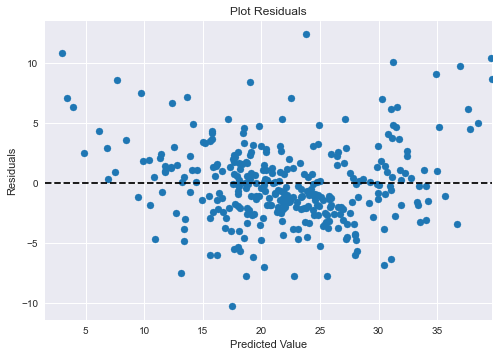

In [22]:
y_pred_model = lr_1.predict(X_1_train)
residuals_ = y_1_train-y_pred_model
fig, ax = plt.subplots()
ax.scatter(x = y_pred_model, y = residuals_, color = 'tab:blue')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Residuals')
ax.set_title('Plot Residuals')
ax.set_xlim(y_pred.min()-1,y_pred.max()+1)
ax.hlines(0,y_pred.min()-1,y_pred.max()+1, linestyles= 'dashed', color = 'black')
plt.show()

from the plot above, we can see the residuals are not scattered randomly across the horizontal line and the variance of the residuals is not constant. So, we can say the third assumption is violated

## Fourth assumption : Normality of Residuals

In [23]:
from scipy import stats
kstest_ = stats.kstest(residuals_, 'norm') # Test Statistics for normality
shapiro_wilks_ = stats.shapiro(residuals_) # another alternative test statistics for normality
print('KS test :')
print(kstest_)
print('Shapiro test :')
print(shapiro_wilks_)

KS test :
KstestResult(statistic=0.28086576855757206, pvalue=1.375741880664356e-23)
Shapiro test :
ShapiroResult(statistic=0.9733676314353943, pvalue=8.54432801133953e-06)


Because both tests lead to significant results, so with 0.05 alpha we reject the null hypothesis that data is distributed normaly. So, we can say the fourth assumption is violated

## Fifth assumption : independent of Residuals

In [24]:
# test statistics for checking autocorrelation of residuals
from statsmodels.stats.stattools import durbin_watson 
durbin_test = durbin_watson(residuals_)
print(durbin_test)

2.1065436417933565


The followings are rules of durbin watson test for autocorrelation :
1. if the test statistics lay below < 1.5 : There is positive correlation
2. if the test statistics lay between 1.5 - 2. 5 : There is no correlation
3. if the test statistics lay above > 2.5 : Theres is negative correlation

from the result above, we can conclude there is no correlation among the residuals.So, we can say the fifth assumption is satisfied

## Higher Order Linear Regression

## Order 2 Model

In [25]:
X_1 = df_1_copy.drop('medv', axis = 1)
Y_1 = df_1_copy['medv']
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,Y_1, test_size= 0.25 ,random_state=  43)
print(f'Row x_train : {X_1_train.shape[0]} & y_train : {y_1_train.shape[0]}')
print(f'Row x_test : {X_1_test.shape[0]} & y_test : {y_1_test.shape[0]}')

Row x_train : 331 & y_train : 331
Row x_test : 111 & y_test : 111


In [26]:
for col in (X_1_train.columns.values):
    X_1_train[f'{col}_2'] = X_1_train[col]**2
for col in (X_1_test.columns.values):
    X_1_test[f'{col}_2'] = X_1_test[col]**2
display(X_1_train.head())
display(X_1_test.head())

,crim,zn,indus,chas,rm,age,rad,ptratio,b,lstat,crim_2,zn_2,indus_2,chas_2,rm_2,age_2,rad_2,ptratio_2,b_2,lstat_2
37,0.08014,0.0,5.96,0,5.850,41.5,5,19.2,396.90,8.77,0.006422,0.0,35.5216,0,34.222500,1722.25,25,368.64,157529.6100,76.9129
467,4.42228,0.0,18.10,0,6.003,94.5,24,20.2,331.29,21.32,19.556560,0.0,327.6100,0,36.036009,8930.25,576,408.04,109753.0641,454.5424
397,7.67202,0.0,18.10,0,5.747,98.9,24,20.2,393.10,19.92,58.859891,0.0,327.6100,0,33.028009,9781.21,576,408.04,154527.6100,396.8064
244,0.20608,22.0,5.86,0,5.593,76.5,7,19.1,372.49,12.50,0.042469,484.0,34.3396,0,31.281649,5852.25,49,364.81,138748.8001,156.2500
105,0.13262,0.0,8.56,0,5.851,96.7,5,20.9,394.05,16.47,0.017588,0.0,73.2736,0,34.234201,9350.89,25,436.81,155275.4025,271.2609


,crim,zn,indus,chas,rm,age,rad,ptratio,b,lstat,crim_2,zn_2,indus_2,chas_2,rm_2,age_2,rad_2,ptratio_2,b_2,lstat_2
67,0.05789,12.5,6.07,0,5.878,21.4,4,18.9,396.21,8.10,0.003351,156.25,36.8449,0,34.550884,457.96,16,357.21,156982.3641,65.6100
229,0.44178,0.0,6.20,0,6.552,21.4,8,17.4,380.34,3.76,0.195170,0.00,38.4400,0,42.928704,457.96,64,302.76,144658.5156,14.1376
169,2.44953,0.0,19.58,0,6.402,95.2,5,14.7,330.04,11.32,6.000197,0.00,383.3764,0,40.985604,9063.04,25,216.09,108926.4016,128.1424
449,7.52601,0.0,18.10,0,6.417,98.3,24,20.2,304.21,19.31,56.640827,0.00,327.6100,0,41.177889,9662.89,576,408.04,92543.7241,372.8761
407,11.95110,0.0,18.10,0,5.608,100.0,24,20.2,332.09,12.13,142.828791,0.00,327.6100,0,31.449664,10000.00,576,408.04,110283.7681,147.1369


In [27]:
## Standardizing data using Standard Scaler
std = StandardScaler()
X_1_train_ss = std.fit_transform(X_1_train)
X_1_test_ss = std.fit_transform(X_1_test)

## Model Building and Evaluation for Order 2 Model

In [28]:
lr_2 = LinearRegression()
lr_2.fit(X_1_train_ss,y_1_train)
r2_score = lr_2.score(X_1_train_ss,y_1_train)
y_hat = lr_2.predict(X_1_test_ss)
mse = mean_squared_error(y_1_test,y_hat)
rmse = np.sqrt(mse)

print('Model Evaluation :')
print('R-Squared Score for model :')
print(r2_score)
print('MSE score :')
print(mse)
print('RMSE score :')
print(rmse)
print('='*50)
print('coefficients of the model :')
print(f'Intercept : {np.round(lr_2.intercept_,3)}')
for i in range(X_1_train.shape[1]):
    print(f'{X_1_train.columns.values[i]} : {np.round(lr_2.coef_[i],3)}')

Model Evaluation :
R-Squared Score for model :
0.8813905301781392
MSE score :
12.242233588456228
RMSE score :
3.4988903367290933
coefficients of the model :
Intercept : 22.156
crim : -4.124
zn : -1.65
indus : -2.45
chas : 0.144
rm : -18.416
age : 1.154
rad : 2.432
ptratio : -1.702
b : 1.405
lstat : -4.328
crim_2 : 2.251
zn_2 : 1.105
indus_2 : 2.697
chas_2 : 0.144
rm_2 : 22.219
age_2 : -1.861
rad_2 : -1.497
ptratio_2 : 0.397
b_2 : -0.872
lstat_2 : 2.026


## Performing OLS with Statsmodels for Order 2 Model

In [29]:
X_train_copy = X_1_train_ss.copy()
Y_train_copy = y_1_train.copy()
X_train_copy = sm.add_constant(X_train_copy)
model = sm.OLS(Y_train_copy, X_train_copy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     121.6
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          1.68e-131
Time:                        14:14:16   Log-Likelihood:                -803.27
No. Observations:                 331   AIC:                             1647.
Df Residuals:                     311   BIC:                             1723.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.1565      0.155    142.617      0.0

## Order 3 Model

In [30]:
# Calculating order 3
for col in (X_1_train.columns.values[:10]):
    X_1_train[f'{col}_3'] = X_1_train[col]**3
for col in (X_1_test.columns.values[:10]):
    X_1_test[f'{col}_3'] = X_1_test[col]**3
display(X_1_train.head())
display(X_1_test.head())

,crim,zn,indus,chas,rm,age,rad,ptratio,b,lstat,...,crim_3,zn_3,indus_3,chas_3,rm_3,age_3,rad_3,ptratio_3,b_3,lstat_3
37,0.08014,0.0,5.96,0,5.850,41.5,5,19.2,396.90,8.77,...,0.000515,0.0,211.708736,0,200.201625,71473.375,125,7077.888,6.252350e+07,674.526133
467,4.42228,0.0,18.10,0,6.003,94.5,24,20.2,331.29,21.32,...,86.484586,0.0,5929.741000,0,216.324162,843908.625,13824,8242.408,3.636009e+07,9690.843968
397,7.67202,0.0,18.10,0,5.747,98.9,24,20.2,393.10,19.92,...,451.574260,0.0,5929.741000,0,189.811968,967361.669,13824,8242.408,6.074480e+07,7904.383488
244,0.20608,22.0,5.86,0,5.593,76.5,7,19.1,372.49,12.50,...,0.008752,10648.0,201.230056,0,174.958263,447697.125,343,6967.871,5.168254e+07,1953.125000
105,0.13262,0.0,8.56,0,5.851,96.7,5,20.9,394.05,16.47,...,0.002333,0.0,627.222016,0,200.304310,904231.063,125,9129.329,6.118627e+07,4467.667023


,crim,zn,indus,chas,rm,age,rad,ptratio,b,lstat,...,crim_3,zn_3,indus_3,chas_3,rm_3,age_3,rad_3,ptratio_3,b_3,lstat_3
67,0.05789,12.5,6.07,0,5.878,21.4,4,18.9,396.21,8.10,...,0.000194,1953.125,223.648543,0,203.090096,9800.344,64,6751.269,6.219798e+07,531.441000
229,0.44178,0.0,6.20,0,6.552,21.4,8,17.4,380.34,3.76,...,0.086222,0.000,238.328000,0,281.268869,9800.344,512,5268.024,5.501942e+07,53.157376
169,2.44953,0.0,19.58,0,6.402,95.2,5,14.7,330.04,11.32,...,14.697663,0.000,7506.509912,0,262.389837,862801.408,125,3176.523,3.595007e+07,1450.571968
449,7.52601,0.0,18.10,0,6.417,98.3,24,20.2,304.21,19.31,...,426.279427,0.000,5929.741000,0,264.238514,949862.087,13824,8242.408,2.815273e+07,7200.237491
407,11.95110,0.0,18.10,0,5.608,100.0,24,20.2,332.09,12.13,...,1706.961167,0.000,5929.741000,0,176.369716,1000000.000,13824,8242.408,3.662414e+07,1784.770597


In [31]:
## Standardizing data using Standard Scaler
std = StandardScaler()
X_1_train_ss = std.fit_transform(X_1_train)
X_1_test_ss = std.fit_transform(X_1_test)

## Model Building and Evaluation for Order 3 Model

In [32]:
lr_3 = LinearRegression()
lr_3.fit(X_1_train_ss,y_1_train)
r2_score = lr_3.score(X_1_train_ss,y_1_train)
y_hat = lr_3.predict(X_1_test_ss)
mse = mean_squared_error(y_1_test,y_hat)
rmse = np.sqrt(mse)

print('Model Evaluation :')
print('R-Squared Score for model :')
print(r2_score)
print('MSE score :')
print(mse)
print('RMSE score :')
print(rmse)
print('='*50)
print('coefficients of the model :')
print(f'Intercept : {np.round(lr_3.intercept_,3)}')
for i in range(X_1_train.shape[1]):
    print(f'{X_1_train.columns.values[i]} : {np.round(lr_3.coef_[i],3)}')

Model Evaluation :
R-Squared Score for model :
0.8867200486728817
MSE score :
11.716959679037487
RMSE score :
3.423004481305493
coefficients of the model :
Intercept : 22.156
crim : -4.635
zn : 0.486
indus : -6.061
chas : 0.111
rm : -34.582
age : 1.692
rad : 10.549
ptratio : 2.535
b : 2.735
lstat : -7.942
crim_2 : 2.913
zn_2 : -5.134
indus_2 : 11.518
chas_2 : 0.111
rm_2 : 53.607
age_2 : -2.685
rad_2 : -34.393
ptratio_2 : -8.186
b_2 : -4.059
lstat_2 : 9.869
crim_3 : -0.408
zn_3 : 4.105
indus_3 : -5.235
chas_3 : 0.111
rm_3 : -15.435
age_3 : 0.253
rad_3 : 24.798
ptratio_3 : 4.471
b_3 : 1.881
lstat_3 : -4.515


## Performing OLS with Statsmodels for Order 3 Model

In [33]:
X_train_copy = X_1_train_ss.copy()
Y_train_copy = y_1_train.copy()
X_train_copy = sm.add_constant(X_train_copy)
model = sm.OLS(Y_train_copy, X_train_copy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     84.43
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          1.95e-125
Time:                        14:14:16   Log-Likelihood:                -795.66
No. Observations:                 331   AIC:                             1649.
Df Residuals:                     302   BIC:                             1760.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.1565      0.154    143.806      0.0

Conclusion : By looking at the $R^{2}$ of order 3 model, apparently the increasing value of $R^{2}$  is not significant compared to the $R^{2}$ value of order 2 model. Therefore, we will choose a simpler model that is order 2 model

## Model to Use (Order 2)

In [34]:
X_1 = df_1_copy.drop('medv', axis = 1)
Y_1 = df_1_copy['medv']
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,Y_1, test_size= 0.25 ,random_state=  43)
print(f'Row x_train : {X_1_train.shape[0]} & y_train : {y_1_train.shape[0]}')
print(f'Row x_test : {X_1_test.shape[0]} & y_test : {y_1_test.shape[0]}')

Row x_train : 331 & y_train : 331
Row x_test : 111 & y_test : 111


In [35]:
for col in (X_1_train.columns.values):
    X_1_train[f'{col}_2'] = X_1_train[col]**2
for col in (X_1_test.columns.values):
    X_1_test[f'{col}_2'] = X_1_test[col]**2
display(X_1_train.head())
display(X_1_test.head())

,crim,zn,indus,chas,rm,age,rad,ptratio,b,lstat,crim_2,zn_2,indus_2,chas_2,rm_2,age_2,rad_2,ptratio_2,b_2,lstat_2
37,0.08014,0.0,5.96,0,5.850,41.5,5,19.2,396.90,8.77,0.006422,0.0,35.5216,0,34.222500,1722.25,25,368.64,157529.6100,76.9129
467,4.42228,0.0,18.10,0,6.003,94.5,24,20.2,331.29,21.32,19.556560,0.0,327.6100,0,36.036009,8930.25,576,408.04,109753.0641,454.5424
397,7.67202,0.0,18.10,0,5.747,98.9,24,20.2,393.10,19.92,58.859891,0.0,327.6100,0,33.028009,9781.21,576,408.04,154527.6100,396.8064
244,0.20608,22.0,5.86,0,5.593,76.5,7,19.1,372.49,12.50,0.042469,484.0,34.3396,0,31.281649,5852.25,49,364.81,138748.8001,156.2500
105,0.13262,0.0,8.56,0,5.851,96.7,5,20.9,394.05,16.47,0.017588,0.0,73.2736,0,34.234201,9350.89,25,436.81,155275.4025,271.2609


,crim,zn,indus,chas,rm,age,rad,ptratio,b,lstat,crim_2,zn_2,indus_2,chas_2,rm_2,age_2,rad_2,ptratio_2,b_2,lstat_2
67,0.05789,12.5,6.07,0,5.878,21.4,4,18.9,396.21,8.10,0.003351,156.25,36.8449,0,34.550884,457.96,16,357.21,156982.3641,65.6100
229,0.44178,0.0,6.20,0,6.552,21.4,8,17.4,380.34,3.76,0.195170,0.00,38.4400,0,42.928704,457.96,64,302.76,144658.5156,14.1376
169,2.44953,0.0,19.58,0,6.402,95.2,5,14.7,330.04,11.32,6.000197,0.00,383.3764,0,40.985604,9063.04,25,216.09,108926.4016,128.1424
449,7.52601,0.0,18.10,0,6.417,98.3,24,20.2,304.21,19.31,56.640827,0.00,327.6100,0,41.177889,9662.89,576,408.04,92543.7241,372.8761
407,11.95110,0.0,18.10,0,5.608,100.0,24,20.2,332.09,12.13,142.828791,0.00,327.6100,0,31.449664,10000.00,576,408.04,110283.7681,147.1369


In [36]:
## Standardizing data using Standard Scaler
std = StandardScaler()
X_1_train_ss = std.fit_transform(X_1_train)
X_1_test_ss = std.fit_transform(X_1_test)

## Model Building & Evaluation

In [37]:
lr_2 = LinearRegression()
lr_2.fit(X_1_train_ss,y_1_train)
r2_score = lr_2.score(X_1_train_ss,y_1_train)
y_hat = lr_2.predict(X_1_test_ss)
mse = mean_squared_error(y_1_test,y_hat)
rmse = np.sqrt(mse)

print('Model Evaluation :')
print('R-Squared Score for model :')
print(r2_score)
print('MSE score :')
print(mse)
print('RMSE score :')
print(rmse)
print('='*50)
print('coefficients of the model :')
print(f'Intercept : {np.round(lr_2.intercept_,3)}')
for i in range(X_1_train.shape[1]):
    print(f'{X_1_train.columns.values[i]} : {np.round(lr_2.coef_[i],3)}')

Model Evaluation :
R-Squared Score for model :
0.8813905301781392
MSE score :
12.242233588456228
RMSE score :
3.4988903367290933
coefficients of the model :
Intercept : 22.156
crim : -4.124
zn : -1.65
indus : -2.45
chas : 0.144
rm : -18.416
age : 1.154
rad : 2.432
ptratio : -1.702
b : 1.405
lstat : -4.328
crim_2 : 2.251
zn_2 : 1.105
indus_2 : 2.697
chas_2 : 0.144
rm_2 : 22.219
age_2 : -1.861
rad_2 : -1.497
ptratio_2 : 0.397
b_2 : -0.872
lstat_2 : 2.026


## Performing OLS with Statsmodels

In [38]:
X_train_copy = X_1_train_ss.copy()
Y_train_copy = y_1_train.copy()
X_train_copy = sm.add_constant(X_train_copy)
model = sm.OLS(Y_train_copy, X_train_copy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     121.6
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          1.68e-131
Time:                        14:14:16   Log-Likelihood:                -803.27
No. Observations:                 331   AIC:                             1647.
Df Residuals:                     311   BIC:                             1723.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.1565      0.155    142.617      0.0

## Model Diagnostic

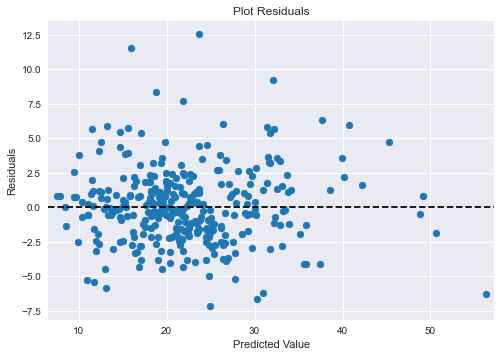

In [39]:
#Checking Homoscedacity assumption for residuals
y_pred_model = lr_2.predict(X_1_train_ss)
residuals_ = y_1_train-y_pred_model
fig, ax = plt.subplots()
ax.scatter(x = y_pred_model, y = residuals_, color = 'tab:blue')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Residuals')
ax.set_title('Plot Residuals')
ax.set_xlim(y_pred_model.min()-1,y_pred_model.max()+1)
ax.hlines(0,y_pred_model.min()-1,y_pred_model.max()+1, linestyles= 'dashed', color = 'black')
plt.show()

In [40]:
# Checking Normality of residuals
from scipy import stats
kstest_ = stats.kstest(residuals_, 'norm') # Test Statistics for normality
shapiro_wilks_ = stats.shapiro(residuals_) # another alternative test statistics for normality
print('KS test :')
print(kstest_)
print('Shapiro test :')
print(shapiro_wilks_)

KS test :
KstestResult(statistic=0.23261997961622427, pvalue=3.113653468301854e-16)
Shapiro test :
ShapiroResult(statistic=0.9664310216903687, pvalue=6.305173201326397e-07)


In [41]:
# test statistics for checking autocorrelation of residuals
from statsmodels.stats.stattools import durbin_watson 
durbin_test = durbin_watson(residuals_)
print(durbin_test)

1.9073289298079248


## Reduced & full model

In [42]:
display(X_1_train.head())
display(X_1_test.head())

,crim,zn,indus,chas,rm,age,rad,ptratio,b,lstat,crim_2,zn_2,indus_2,chas_2,rm_2,age_2,rad_2,ptratio_2,b_2,lstat_2
37,0.08014,0.0,5.96,0,5.850,41.5,5,19.2,396.90,8.77,0.006422,0.0,35.5216,0,34.222500,1722.25,25,368.64,157529.6100,76.9129
467,4.42228,0.0,18.10,0,6.003,94.5,24,20.2,331.29,21.32,19.556560,0.0,327.6100,0,36.036009,8930.25,576,408.04,109753.0641,454.5424
397,7.67202,0.0,18.10,0,5.747,98.9,24,20.2,393.10,19.92,58.859891,0.0,327.6100,0,33.028009,9781.21,576,408.04,154527.6100,396.8064
244,0.20608,22.0,5.86,0,5.593,76.5,7,19.1,372.49,12.50,0.042469,484.0,34.3396,0,31.281649,5852.25,49,364.81,138748.8001,156.2500
105,0.13262,0.0,8.56,0,5.851,96.7,5,20.9,394.05,16.47,0.017588,0.0,73.2736,0,34.234201,9350.89,25,436.81,155275.4025,271.2609


,crim,zn,indus,chas,rm,age,rad,ptratio,b,lstat,crim_2,zn_2,indus_2,chas_2,rm_2,age_2,rad_2,ptratio_2,b_2,lstat_2
67,0.05789,12.5,6.07,0,5.878,21.4,4,18.9,396.21,8.10,0.003351,156.25,36.8449,0,34.550884,457.96,16,357.21,156982.3641,65.6100
229,0.44178,0.0,6.20,0,6.552,21.4,8,17.4,380.34,3.76,0.195170,0.00,38.4400,0,42.928704,457.96,64,302.76,144658.5156,14.1376
169,2.44953,0.0,19.58,0,6.402,95.2,5,14.7,330.04,11.32,6.000197,0.00,383.3764,0,40.985604,9063.04,25,216.09,108926.4016,128.1424
449,7.52601,0.0,18.10,0,6.417,98.3,24,20.2,304.21,19.31,56.640827,0.00,327.6100,0,41.177889,9662.89,576,408.04,92543.7241,372.8761
407,11.95110,0.0,18.10,0,5.608,100.0,24,20.2,332.09,12.13,142.828791,0.00,327.6100,0,31.449664,10000.00,576,408.04,110283.7681,147.1369


In [43]:
from statsmodels.stats.anova import anova_lm
f_model = pd.concat([X_1_train,y_1_train], axis = 1)
r_model = f_model.drop(['chas_2','ptratio_2','b_2'], axis = 1)

In [44]:
display(f_model.head())
display(r_model.head())

,crim,zn,indus,chas,rm,age,rad,ptratio,b,lstat,...,zn_2,indus_2,chas_2,rm_2,age_2,rad_2,ptratio_2,b_2,lstat_2,medv
37,0.08014,0.0,5.96,0,5.850,41.5,5,19.2,396.90,8.77,...,0.0,35.5216,0,34.222500,1722.25,25,368.64,157529.6100,76.9129,21.0
467,4.42228,0.0,18.10,0,6.003,94.5,24,20.2,331.29,21.32,...,0.0,327.6100,0,36.036009,8930.25,576,408.04,109753.0641,454.5424,19.1
397,7.67202,0.0,18.10,0,5.747,98.9,24,20.2,393.10,19.92,...,0.0,327.6100,0,33.028009,9781.21,576,408.04,154527.6100,396.8064,8.5
244,0.20608,22.0,5.86,0,5.593,76.5,7,19.1,372.49,12.50,...,484.0,34.3396,0,31.281649,5852.25,49,364.81,138748.8001,156.2500,17.6
105,0.13262,0.0,8.56,0,5.851,96.7,5,20.9,394.05,16.47,...,0.0,73.2736,0,34.234201,9350.89,25,436.81,155275.4025,271.2609,19.5


,crim,zn,indus,chas,rm,age,rad,ptratio,b,lstat,crim_2,zn_2,indus_2,rm_2,age_2,rad_2,lstat_2,medv
37,0.08014,0.0,5.96,0,5.850,41.5,5,19.2,396.90,8.77,0.006422,0.0,35.5216,34.222500,1722.25,25,76.9129,21.0
467,4.42228,0.0,18.10,0,6.003,94.5,24,20.2,331.29,21.32,19.556560,0.0,327.6100,36.036009,8930.25,576,454.5424,19.1
397,7.67202,0.0,18.10,0,5.747,98.9,24,20.2,393.10,19.92,58.859891,0.0,327.6100,33.028009,9781.21,576,396.8064,8.5
244,0.20608,22.0,5.86,0,5.593,76.5,7,19.1,372.49,12.50,0.042469,484.0,34.3396,31.281649,5852.25,49,156.2500,17.6
105,0.13262,0.0,8.56,0,5.851,96.7,5,20.9,394.05,16.47,0.017588,0.0,73.2736,34.234201,9350.89,25,271.2609,19.5


## Full Model

In [45]:
X_full = std.fit_transform(f_model.drop('medv', axis = 1).copy())
Y_full = f_model['medv'].copy()
X_full= sm.add_constant(X_full)
model_f = sm.OLS(Y_full, X_full).fit()
print(model_f.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     121.6
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          1.68e-131
Time:                        14:14:16   Log-Likelihood:                -803.27
No. Observations:                 331   AIC:                             1647.
Df Residuals:                     311   BIC:                             1723.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.1565      0.155    142.617      0.0

## Reduced Model

In [46]:
X_reduced = std.fit_transform(r_model.drop('medv', axis = 1).copy())
Y_reduced = r_model['medv'].copy()
X_reduced = sm.add_constant(X_reduced)
model_r = sm.OLS(Y_reduced, X_reduced).fit()
print(model_r.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     136.3
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          2.00e-133
Time:                        14:14:16   Log-Likelihood:                -803.79
No. Observations:                 331   AIC:                             1644.
Df Residuals:                     313   BIC:                             1712.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.1565      0.155    142.852      0.0

In [47]:
anova_result = anova_lm(model_r,model_f)
print(anova_result)

   df_resid          ssr  df_diff   ss_diff         F   Pr(>F)
0     313.0  2492.323625      0.0       NaN       NaN      NaN
1     311.0  2484.556869      2.0  7.766756  0.486095  0.61549


## Conclusion for the results

According to the process that we have done previously, a higher model linear regression this case is 2 can explain the target feature better than a simple multiple model linear regression by looking at the $R^{2}$  value from both models.Therefore, we will use the order 2 linear regression model for our prediction model. Next, we would like to see if our current model (order 2 model) can be reduced to such a simpler model without decrasing $R^{2}$ value significantly. We can perform model comparation between reduced model and full model to see if the reduced model has a same performance to the full model. If the reduced model does perfom same as the full model, we can choose the reduced model to avoid overfitting from our model. From the anova test that we have conducted on the reduced model and the full model, the result is statistically non signficant that means the test failed to reject null hypothesis that reduce model does perfom same as the full model. So, the model that we will use is the reduced order 2 model for our data. However, a note that needs to be considered that there's a chance of another form linear regression models that can explain the target feature better that haven't be experimented in this particular project and the current model that we choose violates some of the assumptions for linear regression.

## Building Ridge & Lasso regularization model
In the real world cases, we dont want our model to learn training data to much that it captures the noises in our training data. This problem can lead us to overfitted model that affects the model performances on the testing data. Therefore, there is regularization that needs to be established to our model and the common regularization for regression are ridge and lasso regularization. In section we will try to build a ridge and lasso regression model and followed by model evaluation to see how well our model performs. Before that, we will be exploring more about ridge and lasso regression through following descriptions.

- Ridge Regression.
    - In ridge regression, it is using l2 norm for the penalization and lambda is the tuning paramater that will affect the lost function or  how much flexible we want for our model to be. the following is the formula for ridge regression :
    $$ \large L(x) = OLS + \lambda\sum_{j=1}^{p} B_{j}^{2}$$
- Lasso Regression.
    - In ridge regression, it is using l1 norm for the penalization and lambda is the tuning paramater that will affect the lost function or  how much flexible we want for our model to be. the following is the formula for ridge regression :
    $$ \large L(x) = OLS + \lambda\sum_{j=1}^{p} |B_{j}|$$
    
for more detailed description about ridge & lasso regularization, the following is the website that can be checked furthermore :
https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a

In [48]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV

## Ridge Regression

In [49]:
r_model = f_model.drop(['chas_2','ptratio_2','b_2'], axis = 1)
new_X_1_train = r_model.drop('medv', axis = 1)
new_y_1_train = r_model['medv']
new_X_1_test = X_1_test.drop(['chas_2','ptratio_2','b_2'],axis = 1)
new_y_1_test = y_1_test

In [50]:
## Standardizing data using Standard Scaler
std = StandardScaler()
new_X_1_train_ss = std.fit_transform(new_X_1_train)
new_X_1_test_ss = std.fit_transform(new_X_1_test)

In [51]:
ridge_lr = Ridge(random_state= 43)
cv_score = np.mean(cross_val_score(estimator=ridge_lr,X = new_X_1_train_ss, y = new_y_1_train, cv = 5, scoring='r2', n_jobs=1))
ridge_lr.fit(new_X_1_train_ss,new_y_1_train)
r2_score = ridge_lr.score(new_X_1_train_ss,new_y_1_train)
y_hat = ridge_lr.predict(new_X_1_test_ss)
mse = mean_squared_error(new_y_1_test,y_hat)
rmse = np.sqrt(mse)
print('Model Evaluation :')
print('Cross validation score :')
print(cv_score)
print('R-Squared Score for model :')
print(r2_score)
print('MSE score :')
print(mse)
print('RMSE score :')
print(rmse)
print('='*50)
print('coefficients of the model :')
print(f'Intercept : {np.round(ridge_lr.intercept_,3)}')
for i in range(new_X_1_train.shape[1]):
    print(f'{new_X_1_train.columns.values[i]} : {np.round(ridge_lr.coef_[i],3)}')

Model Evaluation :
Cross validation score :
0.839386159560895
R-Squared Score for model :
0.8709645761344307
MSE score :
14.131580084145847
RMSE score :
3.759199394039354
coefficients of the model :
Intercept : 22.156
crim : -3.71
zn : -1.752
indus : -2.097
chas : 0.234
rm : -7.624
age : 1.099
rad : 2.17
ptratio : -1.48
b : 0.663
lstat : -4.597
crim_2 : 2.182
zn_2 : 1.156
indus_2 : 2.28
rm_2 : 11.572
age_2 : -1.767
rad_2 : -1.452
lstat_2 : 2.64


In [52]:
params_ = {'alpha' : np.arange(1,11)}
grid_ridge = GridSearchCV(estimator=ridge_lr, param_grid=params_, cv= 5, scoring='r2', n_jobs=-1)
grid_ridge.fit(new_X_1_train_ss,new_y_1_train)
y_hat = grid_ridge.predict(new_X_1_test_ss)
mse = mean_squared_error(new_y_1_test,y_hat)
rmse = np.sqrt(mse)
print(f'Best Score : {grid_ridge.best_score_}')
print(f'Best Parameter : {grid_ridge.best_params_}')
print(f'MSE : {mse}')
print(f'RMSE : {rmse}')

Best Score : 0.8393861595608956
Best Parameter : {'alpha': 1}
MSE : 14.131580084145847
RMSE : 3.759199394039354


In [53]:
lasso_lr = Lasso(random_state=43)
cv_score = np.mean(cross_val_score(estimator=lasso_lr,X = new_X_1_train_ss, y = new_y_1_train, cv = 5, scoring='r2', n_jobs=1))
lasso_lr.fit(new_X_1_train_ss,new_y_1_train)
r2_score = lasso_lr.score(new_X_1_train_ss,new_y_1_train)
y_hat = lasso_lr.predict(new_X_1_test_ss)
mse = mean_squared_error(new_y_1_test,y_hat)
rmse = np.sqrt(mse)
print('Model Evaluation :')
print('Cross validation score :')
print(cv_score)
print('R-Squared Score for model :')
print(r2_score)
print('MSE score :')
print(mse)
print('RMSE score :')
print(rmse)
print('='*50)
print('coefficients of the model :')
print(f'Intercept : {np.round(lasso_lr.intercept_,3)}')
for i in range(new_X_1_train.shape[1]):
    print(f'{new_X_1_train.columns.values[i]} : {np.round(lasso_lr.coef_[i],3)}')

Model Evaluation :
Cross validation score :
0.7705120921122214
R-Squared Score for model :
0.7900855418745281
MSE score :
20.73896104210976
RMSE score :
4.554004945332159
coefficients of the model :
Intercept : 22.156
crim : -0.0
zn : 0.0
indus : -0.146
chas : 0.0
rm : 0.0
age : -0.0
rad : -0.0
ptratio : -1.074
b : 0.086
lstat : -2.48
crim_2 : -0.0
zn_2 : 0.0
indus_2 : -0.0
rm_2 : 3.31
age_2 : -0.0
rad_2 : -0.153
lstat_2 : -0.0


In [54]:
params_ = {'alpha' : np.arange(1,11)}
grid_lasso = GridSearchCV(estimator=lasso_lr, param_grid=params_, cv= 5, scoring='r2', n_jobs=-1)
grid_lasso.fit(new_X_1_train_ss,new_y_1_train)
y_hat = grid_lasso.predict(new_X_1_test_ss)
mse = mean_squared_error(new_y_1_test,y_hat)
rmse = np.sqrt(mse)
print(f'Best Score : {grid_lasso.best_score_}')
print(f'Best Parameter : {grid_lasso.best_params_}')
print(f'MSE : {mse}')
print(f'RMSE : {rmse}')

Best Score : 0.7705120921122214
Best Parameter : {'alpha': 1}
MSE : 20.73896104210976
RMSE : 4.554004945332159


## Conclusion of the results

According to the ridge & lasso models that we've done previously, we can see that the ridge regression model has a better performance compared to the lasso regression model by looking at the evaluation of each models. Therefore, we can apply the ridge regression model to our data.

## Non Parametic Method (Random Forest, AdaBoost, GradientBoosting, XGBoost)

In [55]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [56]:
print(df_1_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     442 non-null    float64
 1   zn       442 non-null    float64
 2   indus    442 non-null    float64
 3   chas     442 non-null    int64  
 4   nox      442 non-null    float64
 5   rm       442 non-null    float64
 6   age      442 non-null    float64
 7   dis      442 non-null    float64
 8   rad      442 non-null    int64  
 9   tax      442 non-null    int64  
 10  ptratio  442 non-null    float64
 11  b        442 non-null    float64
 12  lstat    442 non-null    float64
 13  medv     442 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 51.8 KB
None


In [57]:
X_2 = df_1_new.drop('medv', axis = 1)
Y_2 = df_1_new['medv']
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2,Y_2, random_state=2)
print(f'Row x_train : {X_2_train.shape[0]} & y_train : {y_2_train.shape[0]}')
print(f'Row x_test : {X_2_test.shape[0]} & y_test : {y_2_test.shape[0]}')

Row x_train : 331 & y_train : 331
Row x_test : 111 & y_test : 111


In [58]:
print(X_2_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 407 to 195
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     331 non-null    float64
 1   zn       331 non-null    float64
 2   indus    331 non-null    float64
 3   chas     331 non-null    int64  
 4   nox      331 non-null    float64
 5   rm       331 non-null    float64
 6   age      331 non-null    float64
 7   dis      331 non-null    float64
 8   rad      331 non-null    int64  
 9   tax      331 non-null    int64  
 10  ptratio  331 non-null    float64
 11  b        331 non-null    float64
 12  lstat    331 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 36.2 KB
None


## Random Forest Algorithm

In [89]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
cv_score = np.mean(cross_val_score(estimator=rf,X = X_2_train, y = y_2_train, scoring='r2',cv = 5, n_jobs = -1))
rf.fit(X_2_train,y_2_train)
r2_score = rf.score(X_2_train,y_2_train)
y_hat = rf.predict(X_2_test)
mse = mean_squared_error(y_2_test,y_hat)
rmse = np.sqrt(mse)
print('Model Evaluation')
print('='*50)
print('cv_score:')
print(cv_score)
print('R-Squared Score for model :')
print(r2_score)
print('MSE score :')
print(mse)
print('RMSE score :')
print(rmse)

Model Evaluation
cv_score:
0.8396625443253958
R-Squared Score for model :
0.9825775846194506
MSE score :
8.616935162162155
RMSE score :
2.9354616608230732


In [60]:
params_ = {'n_estimators' : np.arange(100,1001,100),
           'criterion' : ['squared_error','absolute_error'],
           'max_features' : ['sqrt','log2',None],
          'min_samples_leaf' : np.arange(1,11)}
grid_rf = GridSearchCV(estimator=rf,param_grid=params_, cv = 5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_2_train,y_2_train)
y_hat = grid_rf.predict(X_2_test)
mse = mean_squared_error(y_2_test,y_hat)
rmse = np.sqrt(mse)
print(f'Best Score : {grid_rf.best_score_}')
print(f'Best Parameter : {grid_rf.best_params_}')
print(f'MSE : {mse}')
print(f'RMSE : {rmse}')

Best Score : 0.8581908864982349
Best Parameter : {'criterion': 'squared_error', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 400}
MSE : 8.10627204842345
RMSE : 2.84715156751857


## AdaBoost Algorithm

In [88]:
ada = AdaBoostRegressor(n_estimators= 100,random_state=42)
cv_score = np.mean(cross_val_score(estimator=ada,X = X_2_train, y = y_2_train, scoring='r2',cv = 5, n_jobs = -1))
ada.fit(X_2_train,y_2_train)
r2_score = ada.score(X_2_train,y_2_train)
y_hat = ada.predict(X_2_test)
mse = mean_squared_error(y_2_test,y_hat)
rmse = np.sqrt(mse)
print('Model Evaluation')
print('='*50)
print('cv_score:')
print(cv_score)
print('R-Squared Score for model :')
print(r2_score)
print('MSE score :')
print(mse)
print('RMSE score :')
print(rmse)

Model Evaluation
cv_score:
0.8252084969658071
R-Squared Score for model :
0.9199424992475542
MSE score :
9.592189223983116
RMSE score :
3.0971259619174543


In [62]:
params_ = {'n_estimators' : np.arange(100,1001,100),
           'learning_rate' : np.arange(0.1,1.1,0.1)}
grid_ada = GridSearchCV(estimator=ada,param_grid=params_, cv = 5, scoring='r2', n_jobs=-1)
grid_ada.fit(X_2_train,y_2_train)
y_hat = grid_ada.predict(X_2_test)
mse = mean_squared_error(y_2_test,y_hat)
rmse = np.sqrt(mse)
print(f'Best Score : {grid_ada.best_score_}')
print(f'Best Parameter : {grid_ada.best_params_}')
print(f'MSE : {mse}')
print(f'RMSE : {rmse}')

Best Score : 0.8304529033286123
Best Parameter : {'learning_rate': 0.8, 'n_estimators': 100}
MSE : 9.112724648443086
RMSE : 3.0187289789650023


## GradientBoost Algorithm

In [90]:
gb = GradientBoostingRegressor(random_state=42)
cv_score = np.mean(cross_val_score(estimator=gb,X = X_2_train, y = y_2_train, scoring='r2',cv = 5, n_jobs = -1))
gb.fit(X_2_train,y_2_train)
r2_score = gb.score(X_2_train,y_2_train)
y_hat = gb.predict(X_2_test)
mse = mean_squared_error(y_2_test,y_hat)
rmse = np.sqrt(mse)
print('Model Evaluation')
print('='*50)
print('cv_score:')
print(cv_score)
print('R-Squared Score for model :')
print(r2_score)
print('MSE score :')
print(mse)
print('RMSE score :')
print(rmse)

Model Evaluation
cv_score:
0.8483238635219574
R-Squared Score for model :
0.9820401826960685
MSE score :
7.622483670482399
RMSE score :
2.7608845811591616


In [64]:
params_ = {'n_estimators' : np.arange(100,1001,100),
           'learning_rate' : np.arange(0.1,1.1,0.1),
          'loss' : ['squared_error','absolute_error','quantile'],
          'max_depth' : [1,2,3,4,5]}
grid_gb = GridSearchCV(estimator=gb,param_grid=params_, cv = 5, scoring='r2', n_jobs=-1)
grid_gb.fit(X_2_train,y_2_train)
y_hat = grid_gb.predict(X_2_test)
mse = mean_squared_error(y_2_test,y_hat)
rmse = np.sqrt(mse)
print(f'Best Score : {grid_gb.best_score_}')
print(f'Best Parameter : {grid_gb.best_params_}')
print(f'MSE : {mse}')
print(f'RMSE : {rmse}')

Best Score : 0.8551051348011829
Best Parameter : {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'n_estimators': 400}
MSE : 6.737976957115799
RMSE : 2.5957613444066463


## Extreme Gradient Boost Algorithm

In [73]:
from xgboost import XGBRFRegressor
from sklearn.metrics import r2_score as R2

In [91]:
xgb = XGBRFRegressor(random_state = 42)
cv_score = np.mean(cross_val_score(estimator=xgb,X = X_2_train, y = y_2_train, scoring='r2',cv = 5, n_jobs = -1))
xgb.fit(X_2_train.values,y_2_train)
y_hat_train = xgb.predict(X_2_train.values)
y_hat = xgb.predict(X_2_test.values)
r2_score = R2(y_2_train,y_hat_train)
mse = mean_squared_error(y_2_test,y_hat)
rmse = np.sqrt(mse)


print('Model Evaluation')
print('='*50)
print('cv_score:')
print(cv_score)
print('R-Squared Score for model :')
print(r2_score)
print('MSE score :')
print(mse)
print('RMSE score :')
print(rmse)

Model Evaluation
cv_score:
0.8302204550472361
R-Squared Score for model :
0.9669986271343106
MSE score :
9.608689537703476
RMSE score :
3.099788627907309


In [81]:
params_  = {'learning_rate' : np.arange(0.1,1.1,0.1),
            'max_depth' : [1,2,3,4,5,6],
            'n_estimators' : np.arange(100,1001,100),
            'min_child_weight' :[1,2,3,4,5]}
grid_xgb = GridSearchCV(estimator=xgb, param_grid=params_, cv=5,scoring='r2',n_jobs=-1)
grid_xgb.fit(X_2_train.values,y_2_train)
y_hat = grid_xgb.predict(X_2_test.values)
mse = mean_squared_error(y_2_test,y_hat)
rmse = np.sqrt(mse)
print(f'Best Score : {grid_xgb.best_score_}')
print(f'Best Parameter : {grid_xgb.best_params_}')
print(f'MSE : {mse}')
print(f'RMSE : {rmse}')

Best Score : 0.8451918389864046
Best Parameter : {'learning_rate': 1.0, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 200}
MSE : 10.392350272442842
RMSE : 3.2237168412320027


## Conclusion of the results

According to the non parametic model that we've done previously, we can se that non parametic model (Random Forest, AdaBoost, GradientBoost, and XGBoost) have significant model performance compared to the OLS linear model, ridge, and lasso model by looking at evaluation of the model. The reason behind that is the non parametic models don't have strict assumptions, can handle missing values, and don't need to scalling the data.  because of that, the non parametic models perfom better compared to the OLS linear model, ridge, and lasso model. from the evaluation of the non parametic models that we can see above, the model that we will choose is GradientBoost model